<a href="https://colab.research.google.com/github/bhargav-pandiri/rompit-collections/blob/main/Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analytics and Visualization/Synthetic_Financial_datasets_log.csv")
display(data)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
for dt in data.columns:
    if data[dt].dtype == 'object':
        print(dt)

type
nameOrig
nameDest


<Axes: ylabel='count'>

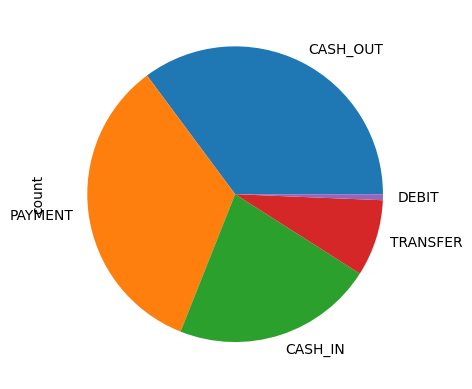

In [12]:
data['type'].value_counts().plot(kind='pie',)

In [13]:
a = data['type'].value_counts()
a

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [14]:
car_list_type = a.index
char_list_type = list(car_list_type)
char_list_type

['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']

In [15]:
data['type'].replace(char_list_type , [1,2,3,4,5],inplace= True)

In [16]:
print((data['nameDest'] == data['nameOrig']).value_counts())

False    6362620
Name: count, dtype: int64


In [17]:
data['nameDest'] = data['nameDest'].str[1:]
data['nameOrig'] = data['nameOrig'].str[1:]

In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0
1,1,2,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0
4,1,2,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Step 3: Preprocessing
# Define features (X) and target (y)
X = df.drop(['isFraud'], axis=1)  # Features
y = df['isFraud']  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000


Confusion Matrix:
[[1981    0]
 [  19    0]]


In [26]:
import pickle

# Step 3: Save the model using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print("Model saved as 'svm_model.pkl'.")

# Step 4: Load the model using pickle
with open('/content/svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully.")

# Test loaded model
accuracy = loaded_model.score(X_test, y_test)
print(f"Accuracy of the loaded model: {accuracy:.2f}")


Model saved as 'svm_model.pkl'.
Model loaded successfully.
Accuracy of the loaded model: 0.99
